In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder


housing = pd.read_csv("files/housing.csv")
housing_cat = housing[["ocean_proximity"]]
housing_num = housing.select_dtypes(np.number)

In [3]:
from sklearn.metrics.pairwise import rbf_kernel

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

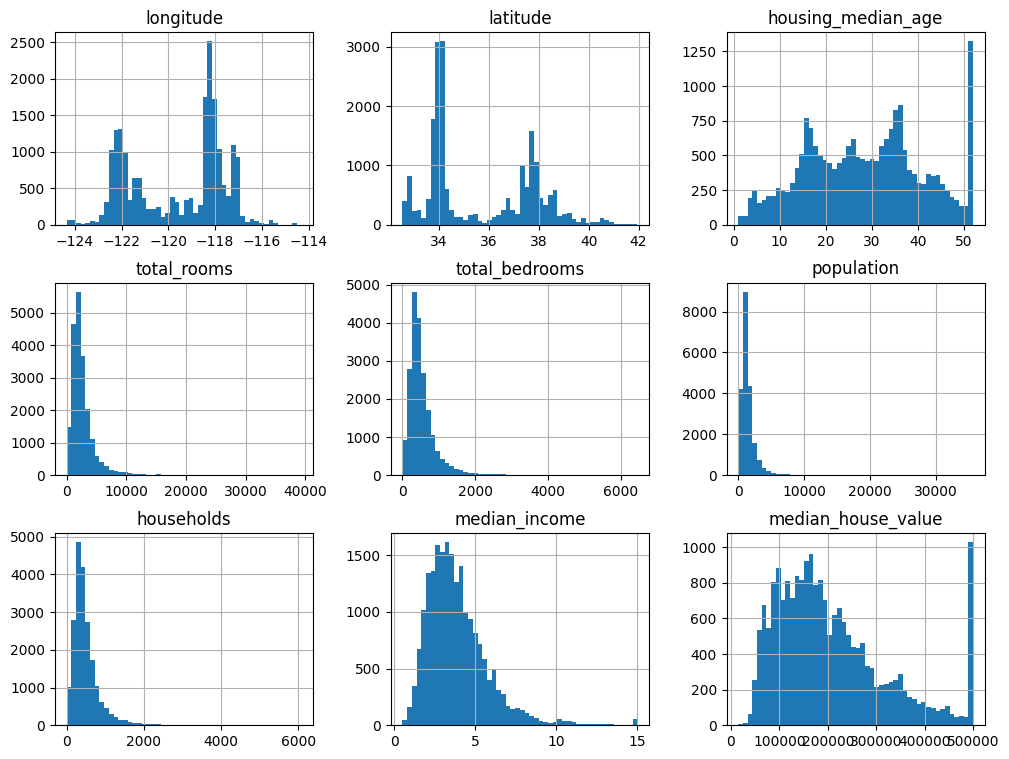

In [2]:
housing.hist(bins= (50), figsize= (12,9))

In [4]:
from sklearn.metrics.pairwise import rbf_kernel

In [13]:
age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma= 00.01)
age_simil_35

array([[0.69767633],
       [0.14085842],
       [0.05557621],
       ...,
       [0.0391639 ],
       [0.05557621],
       [0.02705185]])

In [14]:
age_simil_16 = rbf_kernel(housing[["housing_median_age"]], [[16]], gamma= 0.1)
age_simil_16

array([[7.18778174e-28],
       [8.20849986e-02],
       [5.19320116e-57],
       ...,
       [9.04837418e-01],
       [6.70320046e-01],
       [1.00000000e+00]])

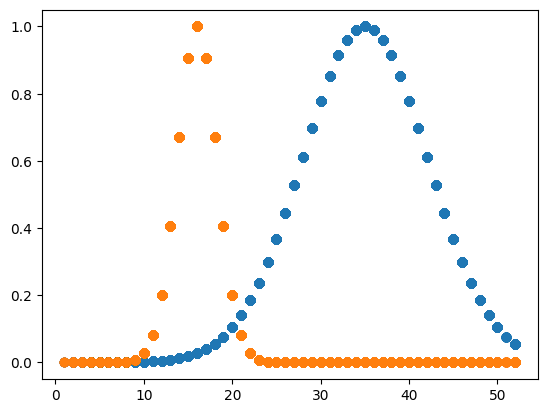

In [15]:
plt.scatter(housing["housing_median_age"], age_simil_35)
plt.scatter(housing["housing_median_age"], age_simil_16)

In [16]:
housing["age_simil_35"] = age_simil_35

In [17]:
housing["age_simil_16"] = age_simil_16

In [18]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,age_simil_35,age_simil_16
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.697676,7.187782e-28
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.140858,8.208500e-02
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.055576,5.193201e-57
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.055576,5.193201e-57
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.055576,5.193201e-57
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0.367879,3.035391e-04
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0.055576,6.703200e-01
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0.039164,9.048374e-01
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0.055576,6.703200e-01


In [19]:
housing = housing.drop("housing_median_age", axis=1)
housing

,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,age_simil_35,age_simil_16
0,-122.23,37.88,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.697676,7.187782e-28
1,-122.22,37.86,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.140858,8.208500e-02
2,-122.24,37.85,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.055576,5.193201e-57
3,-122.25,37.85,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.055576,5.193201e-57
4,-122.25,37.85,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.055576,5.193201e-57
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0.367879,3.035391e-04
20636,-121.21,39.49,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0.055576,6.703200e-01
20637,-121.22,39.43,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0.039164,9.048374e-01
20638,-121.32,39.43,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0.055576,6.703200e-01
